In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf


In [ ]:
df = pd.read_csv("/content/ipl_dataset.csv")
df.head()


,full_scorecard,team1,team2,team1_score,team2_score,toss_winner,toss_choice,winner,margin,man_of_the_match,stadium,place
0,https://stats.espncricinfo.com/ci/engine/match...,Chennai Super Kings,Kolkata Knight Riders,131.0,133.0,Kolkata Knight Riders,Field,KKR,6 wickets,Umesh Yadav,Wankhede Stadium,Mumbai
1,https://stats.espncricinfo.com/ci/engine/match...,Mumbai Indians,Delhi Capitals,177.0,179.0,Delhi Capitals,Field,Capitals,4 wickets,Kuldeep Yadav,Brabourne Stadium,Mumbai
2,https://stats.espncricinfo.com/ci/engine/match...,Royal Challengers Bangalore,Punjab Kings,205.0,208.0,Punjab Kings,Field,Punjab,5 wickets,Odean Smith,Dr DY Patil Sports Academy,Mumbai
3,https://stats.espncricinfo.com/ci/engine/match...,Lucknow Super Giants,Gujarat Titans,158.0,161.0,Gujarat Titans,Field,Titans,5 wickets,Mohammed Shami,Wankhede Stadium,Mumbai
4,https://stats.espncricinfo.com/ci/engine/match...,Rajasthan Royals,Sunrisers Hyderabad,210.0,149.0,Sunrisers Hyderabad,Field,Royals,61 runs,Sanju Samson,Maharashtra Cricket Association Stadium,Pune


In [ ]:
df.drop(['full_scorecard','place' ],axis =1 , inplace = True)
df

,team1,team2,team1_score,team2_score,toss_winner,toss_choice,winner,margin,man_of_the_match,stadium
0,Chennai Super Kings,Kolkata Knight Riders,131.0,133.0,Kolkata Knight Riders,Field,KKR,6 wickets,Umesh Yadav,Wankhede Stadium
1,Mumbai Indians,Delhi Capitals,177.0,179.0,Delhi Capitals,Field,Capitals,4 wickets,Kuldeep Yadav,Brabourne Stadium
2,Royal Challengers Bangalore,Punjab Kings,205.0,208.0,Punjab Kings,Field,Punjab,5 wickets,Odean Smith,Dr DY Patil Sports Academy
3,Lucknow Super Giants,Gujarat Titans,158.0,161.0,Gujarat Titans,Field,Titans,5 wickets,Mohammed Shami,Wankhede Stadium
4,Rajasthan Royals,Sunrisers Hyderabad,210.0,149.0,Sunrisers Hyderabad,Field,Royals,61 runs,Sanju Samson,Maharashtra Cricket Association Stadium
...,...,...,...,...,...,...,...,...,...,...
953,Royal Challengers Bangalore,Mumbai Indians,NaN,126.0,Mumbai Indians,Field,Mumbai,9 wickets,Dilhara Fernando,M Chinnaswamy Stadium
954,Kings XI Punjab,Rajasthan Royals,221.0,180.0,Rajasthan Royals,Field,Kings,41 runs,Shaun Marsh,Punjab Cricket Association Stadium
955,Rajasthan Royals,Delhi Daredevils,192.0,87.0,Delhi Daredevils,Field,Royals,105 runs,Shane Watson,Wankhede Stadium
956,Kings XI Punjab,Chennai Super Kings,112.0,116.0,Kings XI Punjab,Bat,Super,9 wickets,Makhaya Ntini,Wankhede Stadium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   team1             958 non-null    object 
 1   team2             950 non-null    object 
 2   team1_score       930 non-null    float64
 3   team2_score       948 non-null    float64
 4   toss_winner       950 non-null    object 
 5   toss_choice       958 non-null    object 
 6   winner            958 non-null    object 
 7   margin            958 non-null    object 
 8   man_of_the_match  950 non-null    object 
 9   stadium           950 non-null    object 
dtypes: float64(2), object(8)
memory usage: 75.0+ KB


In [ ]:
df.shape

(958, 10)

In [ ]:
df.describe()

,team1_score,team2_score
count,930.000000,948.000000
mean,163.149462,149.282700
std,29.695734,30.606165
min,67.000000,2.000000
25%,145.000000,132.000000
50%,164.000000,151.000000
75%,183.000000,170.000000
max,263.000000,226.000000


In [ ]:
df.isnull().sum()

team1                0
team2                8
team1_score         28
team2_score         10
toss_winner          8
toss_choice          0
winner               0
margin               0
man_of_the_match     8
stadium              8
dtype: int64

In [ ]:
df.iloc[:,:-1]
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

team1               0
team2               0
team1_score         0
team2_score         0
toss_winner         0
toss_choice         0
winner              0
margin              0
man_of_the_match    0
stadium             0
dtype: int64

In [ ]:
df.shape

(930, 10)

In [ ]:
df['team1'].unique()

array(['Chennai Super Kings', 'Mumbai Indians',
       'Royal Challengers Bangalore', 'Lucknow Super Giants',
       'Rajasthan Royals', 'Kolkata Knight Riders', 'Punjab Kings',
       'Gujarat Titans', 'Delhi Capitals', 'Sunrisers Hyderabad',
       'Kings XI Punjab', 'Delhi Daredevils', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Rising Pune Supergiants',
       'Pune Warriors', 'Deccan Chargers', 'Kochi Tuskers Kerala'],
      dtype=object)

In [ ]:
df['team1']=df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
df['team2']=df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
df['toss_winner']=df['toss_winner'].str.replace('Delhi Daredevils','Delhi Capitals')

df['team1']=df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df['team2']=df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df['toss_winner']=df['toss_winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

df['team1']=df['team1'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
df['team2']=df['team2'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
df['toss_winner']=df['toss_winner'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')

df['team1']=df['team1'].str.replace('Kings XI Punjab','Punjab Kings')
df['team2']=df['team2'].str.replace('Kings XI Punjab','Punjab Kings')
df['toss_winner']=df['toss_winner'].str.replace('Kings XI Punjab','Punjab Kings')

In [ ]:
df['team1'].unique()

array(['Chennai Super Kings', 'Mumbai Indians',
       'Royal Challengers Bangalore', 'Lucknow Super Giants',
       'Rajasthan Royals', 'Kolkata Knight Riders', 'Punjab Kings',
       'Gujarat Titans', 'Delhi Capitals', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiant', 'Pune Warriors',
       'Kochi Tuskers Kerala'], dtype=object)

In [ ]:
df["winner"].unique()

array(['KKR', 'Capitals', 'Punjab', 'Titans', 'Royals', 'RCB', 'Super',
       'Sunrisers', 'Mumbai', 'Tied', 'Kings', 'Daredevils', 'Supergiant',
       'Guj', 'Supergiants', 'No', 'Warriors', 'Chargers', 'Kochi'],
      dtype=object)

In [ ]:
df['winner']=df['winner'].str.replace('Capitals','DC')
df['winner']=df['winner'].str.replace('Punjab','PBKS')
df['winner']=df['winner'].str.replace('Titans','GT')
df['winner']=df['winner'].str.replace('Royals','RR')
df['winner']=df['winner'].str.replace('Super','CSK')
df['winner']=df['winner'].str.replace('Sunrisers','SRH')
df['winner']=df['winner'].str.replace('Mumbai','MI')
df['winner']=df['winner'].str.replace('Kings','PBKS')
df['winner']=df['winner'].str.replace('Daredevils','DC')
df['winner']=df['winner'].str.replace('Supergiant','RPS')
df['winner']=df['winner'].str.replace('Guj','GL')
df['winner']=df['winner'].str.replace('Supergiants','RPS')
df['winner']=df['winner'].str.replace('Warriors','PWI')
df['winner']=df['winner'].str.replace('Chargers','SRH')
df['winner']=df['winner'].str.replace('Kochi','KTK')

In [ ]:
df['winner']=df['winner'].str.replace('CSKgiants','RPS')
df['winner']=df['winner'].str.replace('CSKgiant','RPS')

In [ ]:
df['winner']=df['winner'].str.replace('RPSs','RPS')

In [ ]:
df["winner"].unique()

array(['KKR', 'DC', 'PBKS', 'GT', 'RR', 'RCB', 'CSK', 'SRH', 'MI', 'Tied',
       'RPS', 'GL', 'No', 'PWI', 'KTK'], dtype=object)

In [ ]:
x = ["stadium", "toss_choice", "winner"]
for i in x:
  print("------------")
  print(df[i].unique())
  print(df[i].value_counts())

------------
['Wankhede Stadium' 'Brabourne Stadium' 'Dr DY Patil Sports Academy'
 'Maharashtra Cricket Association Stadium' 'Eden Gardens'
 'Narendra Modi Stadium' 'MA Chidambaram Stadium' 'Arun Jaitley Stadium'
 'Dubai International Cricket Stadium' 'Zayed Cricket Stadium'
 'Sharjah Cricket Stadium' 'Sheikh Zayed Stadium' 'Sawai Mansingh Stadium'
 'Feroz Shah Kotla' 'M Chinnaswamy Stadium'
 'Rajiv Gandhi International Stadium'
 'Punjab Cricket Association IS Bindra Stadium'
 'Andhra Cricket Association-Visakhapatnam District Cricket Association Stadium'
 'Holkar Cricket Stadium' 'Saurashtra Cricket Association Stadium'
 'Green Park' 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Shaheed Veer Narayan Singh International Stadium' 'Sardar Patel Stadium'
 'Punjab Cricket Association Stadium' 'JSCA International Stadium Complex'
 'Barabati Stadium' 'Subrata Roy Sahara Stadium'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Vidarbha Cricket Association Stadium' 

Text(0.5, 1.0, 'Number of  IPL  matches won by each team')

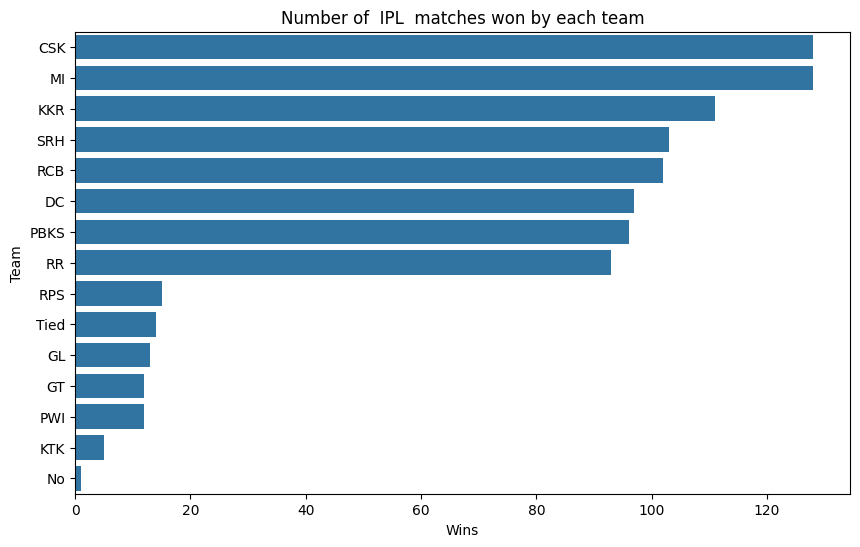

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'winner',data = df,order= df['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  IPL  matches won by each team')

Text(0.5, 1.0, 'Total Number of matches played in different stadium')

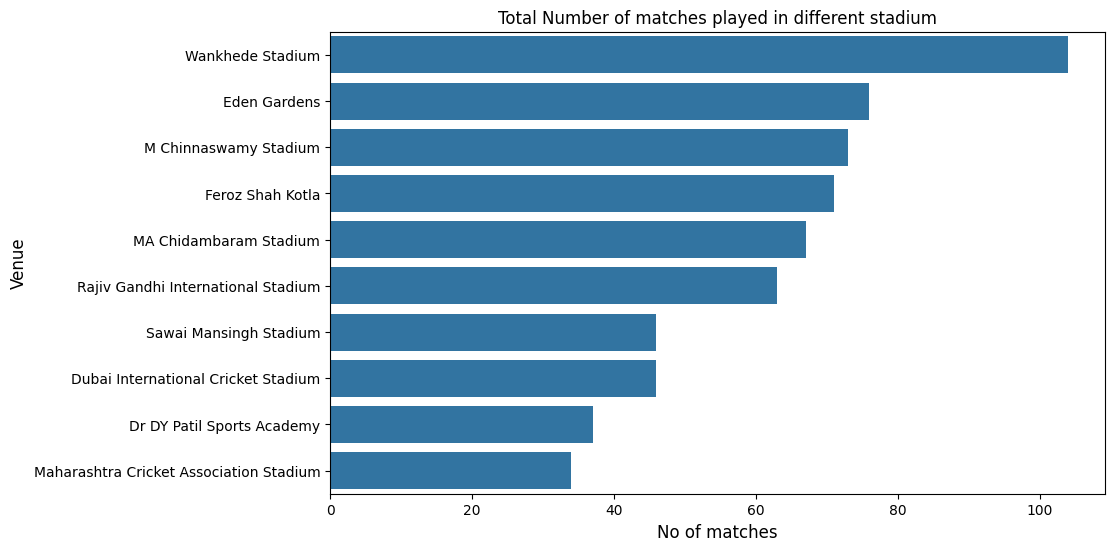

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'stadium',data = df,order = df['stadium'].value_counts().iloc[:10].index)
plt.xlabel('No of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Total Number of matches played in different stadium')

Text(0.5, 1.0, 'Toss Decision')

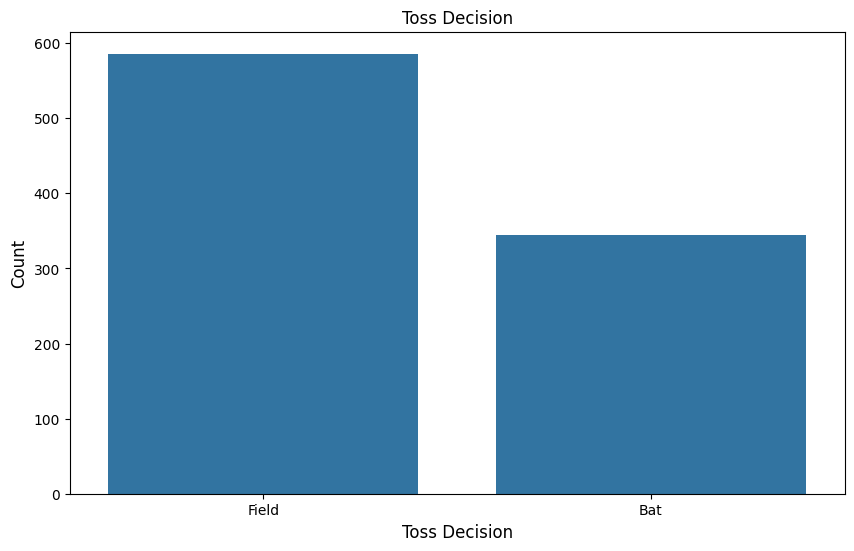

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x = "toss_choice", data=df)
plt.xlabel('Toss Decision',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Toss Decision')

In [ ]:
df

,team1,team2,team1_score,team2_score,toss_winner,toss_choice,winner,margin,man_of_the_match,stadium
0,Chennai Super Kings,Kolkata Knight Riders,131.0,133.0,Kolkata Knight Riders,Field,KKR,6 wickets,Umesh Yadav,Wankhede Stadium
1,Mumbai Indians,Delhi Capitals,177.0,179.0,Delhi Capitals,Field,DC,4 wickets,Kuldeep Yadav,Brabourne Stadium
2,Royal Challengers Bangalore,Punjab Kings,205.0,208.0,Punjab Kings,Field,PBKS,5 wickets,Odean Smith,Dr DY Patil Sports Academy
3,Lucknow Super Giants,Gujarat Titans,158.0,161.0,Gujarat Titans,Field,GT,5 wickets,Mohammed Shami,Wankhede Stadium
4,Rajasthan Royals,Sunrisers Hyderabad,210.0,149.0,Sunrisers Hyderabad,Field,RR,61 runs,Sanju Samson,Maharashtra Cricket Association Stadium
...,...,...,...,...,...,...,...,...,...,...
952,Sunrisers Hyderabad,Chennai Super Kings,147.0,148.0,Sunrisers Hyderabad,Bat,CSK,7 wickets,Suresh Raina,Rajiv Gandhi International Stadium
954,Punjab Kings,Rajasthan Royals,221.0,180.0,Rajasthan Royals,Field,PBKS,41 runs,Shaun Marsh,Punjab Cricket Association Stadium
955,Rajasthan Royals,Delhi Capitals,192.0,87.0,Delhi Capitals,Field,RR,105 runs,Shane Watson,Wankhede Stadium
956,Punjab Kings,Chennai Super Kings,112.0,116.0,Punjab Kings,Bat,CSK,9 wickets,Makhaya Ntini,Wankhede Stadium


In [ ]:
x= df.drop(['team1_score','team2_score','man_of_the_match','stadium','winner'],axis=1)
x

,team1,team2,toss_winner,toss_choice,margin
0,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,Field,6 wickets
1,Mumbai Indians,Delhi Capitals,Delhi Capitals,Field,4 wickets
2,Royal Challengers Bangalore,Punjab Kings,Punjab Kings,Field,5 wickets
3,Lucknow Super Giants,Gujarat Titans,Gujarat Titans,Field,5 wickets
4,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,Field,61 runs
...,...,...,...,...,...
952,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,Bat,7 wickets
954,Punjab Kings,Rajasthan Royals,Rajasthan Royals,Field,41 runs
955,Rajasthan Royals,Delhi Capitals,Delhi Capitals,Field,105 runs
956,Punjab Kings,Chennai Super Kings,Punjab Kings,Bat,9 wickets


In [ ]:
y = df["winner"]
y

0       KKR
1        DC
2      PBKS
3        GT
4        RR
       ... 
952     CSK
954    PBKS
955      RR
956     CSK
957      RR
Name: winner, Length: 930, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

Model Training


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,min_samples_split=3,max_features = "auto")
model

RandomForestClassifier(max_features='auto', min_samples_split=3,
                       n_estimators=200)

In [ ]:
model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_pred, y_test)
ac